In [4]:
import pandas as pd

pd.set_option('display.max_rows', None)
businessDF = pd.read_csv("yelp_business.csv")
arizonaTips = pd.read_csv("yelp_review_arizona.csv")
#Join Tables on business ID
merged_df = pd.merge(businessDF, arizonaTips, on='business_id', how = 'inner')

df = pd.DataFrame()

import re

def remove_chars_and_spaces(string):
    # Using regular expression to replace {}"', and spaces with an empty string
    result = re.sub(r'[{}"\']|\s+', '', string)
    return result      


for index,row in merged_df.iterrows():
    dict1 = remove_chars_and_spaces(row['attributes'])
    dict1 = dict1.split(",")
    for i in dict1:
        if index == 0:
            newlist = i.split(":")
            # print(newlist[0])
            # print(newlist[1])
            if newlist[0] not in df.columns:
                df[newlist[0]] = [newlist[1]]

print(df)

column_counter=0
for index, row in merged_df.iterrows():
    dict1 = remove_chars_and_spaces(row['attributes'])
    dict1 = dict1.split(",")
    for i in dict1:
         newlist = i.split(":")
         if newlist[0] not in df.columns:
            df[newlist[0]] = None 
            column_counter+=1# Initialize column if it doesn't exist
            print(column_counter)
    #Now that all required columns are added, assign values row by row
    for i in dict1:
        newlist = i.split(":")
        df.at[index, newlist[0]] = newlist[1]
       




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [5]:
# df_full_merge = pd.merge(merged_df, df, left_index=True, right_index=True)
# df_full_merge.to_csv('final_df.csv')
# #print head to chek that df has been processed correctly
# print(df_full_merge.head())

              business_id                          name  \
0  44YFU284Z3KDEy25QyVoUw  Nee House Chinese Restaurant   
1  44YFU284Z3KDEy25QyVoUw  Nee House Chinese Restaurant   
2  44YFU284Z3KDEy25QyVoUw  Nee House Chinese Restaurant   
3  44YFU284Z3KDEy25QyVoUw  Nee House Chinese Restaurant   
4  44YFU284Z3KDEy25QyVoUw  Nee House Chinese Restaurant   

                      address     city state postal_code  latitude  \
0  13843 N Tatum Blvd, Ste 15  Phoenix    AZ       85032  33.61302   
1  13843 N Tatum Blvd, Ste 15  Phoenix    AZ       85032  33.61302   
2  13843 N Tatum Blvd, Ste 15  Phoenix    AZ       85032  33.61302   
3  13843 N Tatum Blvd, Ste 15  Phoenix    AZ       85032  33.61302   
4  13843 N Tatum Blvd, Ste 15  Phoenix    AZ       85032  33.61302   

    longitude  stars_x  review_count  ...  vegan kosher halal soy-free  \
0 -111.977036      3.5           269  ...   None   None  None     None   
1 -111.977036      3.5           269  ...   None   None  None     None   
2 

In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)
df_final = pd.read_csv('final_df.csv', low_memory = False)

filtered_df = df_final.groupby('business_id').filter(lambda x: len(x) > 30)

# Display the filtered DataFrame
print(filtered_df.head())




    Unnamed: 0             business_id                    name  \
48          48  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
49          49  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
50          50  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
51          51  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
52          52  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   

                address     city state  postal_code  latitude   longitude  \
48  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
49  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
50  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
51  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
52  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   

    stars_x  ...  vegan  kosher halal soy-free vegetarian ByAppointmentOnly  \
48      3.5  ...    NaN     NaN   NaN      NaN        NaN    

In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
print(filtered_df.head())

    Unnamed: 0             business_id                    name  \
48          48  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
49          49  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
50          50  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
51          51  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   
52          52  dUffgo9Lh_Vk9TLuFR5ywg  Oregano's Pizza Bistro   

                address     city state  postal_code  latitude   longitude  \
48  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
49  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
50  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
51  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   
52  1008 E Camelback Rd  Phoenix    AZ        85014  33.50951 -112.060238   

    stars_x  ...  vegan  kosher halal soy-free vegetarian ByAppointmentOnly  \
48      3.5  ...    NaN     NaN   NaN      NaN        NaN    

In [6]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


#drop null values
filtered_df = filtered_df.dropna(subset=['GoodForKids'])
filtered_df['GoodForKids'] = filtered_df['GoodForKids'].astype(int)

X = filtered_df['text']

#Drop Null Values
y = filtered_df['GoodForKids']

#Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df = 1)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

#Initialize classifier
classifier = MultinomialNB()

#Perform k-fold cross-validation
cv_results = cross_val_score(classifier, X_tfidf, y, cv=10, scoring='accuracy')

#Display cross-validation results
print("Cross-validation results:")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")

# Print the classification report
y_pred_cv = cross_val_predict(classifier, X_tfidf, y, cv=10)
# Create a classification report
report = classification_report(y, y_pred_cv)
cm = confusion_matrix(y, y_pred_cv)
# Print the classification report
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(cm)
      
      


Cross-validation results:
Mean Accuracy: 0.7218
Standard Deviation: 0.0125
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.10      0.17      2605
           1       0.72      0.98      0.83      6254

    accuracy                           0.72      8859
   macro avg       0.71      0.54      0.50      8859
weighted avg       0.71      0.72      0.64      8859

Confusion Matrix:
[[ 252 2353]
 [ 112 6142]]


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt



def Success_ranker(row,star_rating_weight=0.7, num_reviews_weight=0.3):
    min_reviews = df_final['review_count'].min()
    max_reviews = df_final['review_count'].max()
    normalized_reviews = (row['review_count'] - min_reviews) / (max_reviews - min_reviews)
    
    # Calculate composite score
    composite_score = (star_rating_weight * row['stars_x']) + (num_reviews_weight * normalized_reviews)
    
    return composite_score



#Apply the function to create the new column
df_final['success'] = df_final.apply(Success_ranker, axis=1)



In [8]:
!pip install tensorflow
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install torchtext

Defaulting to user installation because normal site-packages is not writeable


In [29]:
    import numpy as np
    from sklearn.model_selection import train_test_split
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    # Assume your textual review data is stored in a DataFrame column named 'text_data'
    # And the success values are stored in another column named 'success_values'
    
    # Tokenize and pad sequences
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(df_final['text'])
    sequences = tokenizer.texts_to_sequences(df_final['text'])
    max_length = 100  # Example max length
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_final['success'], test_size=0.2, random_state=42)
    
    # Define vocabulary size
    vocab_size = len(tokenizer.word_index) + 1
    
    # Define embedding dimension
    embedding_dim = 100  # Example dimensionality of word embeddings
    
    # Define neural network architecture with word embeddings
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(128),  # Example LSTM layer
        Dense(64, activation='tanh'),
        Dense(1)  # Output layer for regression
    ])
    
    # Compile the model with r2 as a metric
    
    import tensorflow.keras.backend as K
    
    def r_squared(y_true, y_pred):
        SS_res =  K.sum(K.square(y_true - y_pred)) 
        SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
        return 1 - SS_res/(SS_tot + K.epsilon())
        
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_squared])
    
    # Train the model
    model.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8


C:\Users\Max\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


666/666 ━━━━━━━━━━━━━━━━━━━━ 118s 168ms/step - loss: 0.4827 - r_squared: -3.8876 - val_loss: 0.1183 - val_r_squared: -0.1454
Epoch 2/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 124s 186ms/step - loss: 0.1032 - r_squared: -0.0494 - val_loss: 0.1092 - val_r_squared: -0.0654
Epoch 3/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 124s 187ms/step - loss: 0.0964 - r_squared: 0.0144 - val_loss: 0.1140 - val_r_squared: -0.1223
Epoch 4/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 123s 185ms/step - loss: 0.0839 - r_squared: 0.1509 - val_loss: 0.1075 - val_r_squared: -0.0555
Epoch 5/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 127s 191ms/step - loss: 0.0694 - r_squared: 0.2885 - val_loss: 0.0988 - val_r_squared: 0.0238
Epoch 6/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 127s 190ms/step - loss: 0.0506 - r_squared: 0.4814 - val_loss: 0.1034 - val_r_squared: -0.0255
Epoch 7/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 125s 187ms/step - loss: 0.0385 - r_squared: 0.5904 - val_loss: 0.1073 - val_r_squared: -0.0734
Epoch 8/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 125s 187ms/step - loss: 0.0292 -

In [30]:
# Evaluate the model on the test set


loss, r2 = model.evaluate(X_test, y_test)

# Print the loss
print("Test Loss - Mean Squared Error:", loss)


167/167 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - loss: 0.1163 - r_squared: -0.2031
Test Loss - Mean Squared Error: 0.11910298466682434


167/167 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step


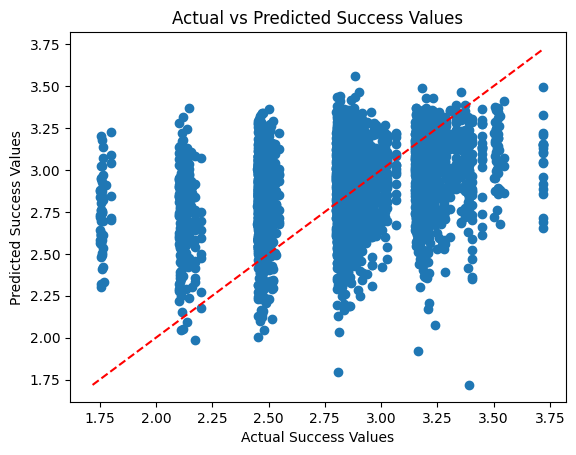

In [31]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)
# Get the range of actual success values
min_value = min(y_test.min(), y_pred.min())
max_value = max(y_test.max(), y_pred.max())


# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Success Values')
plt.ylabel('Predicted Success Values')
plt.title('Actual vs Predicted Success Values')
plt.show()

167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step


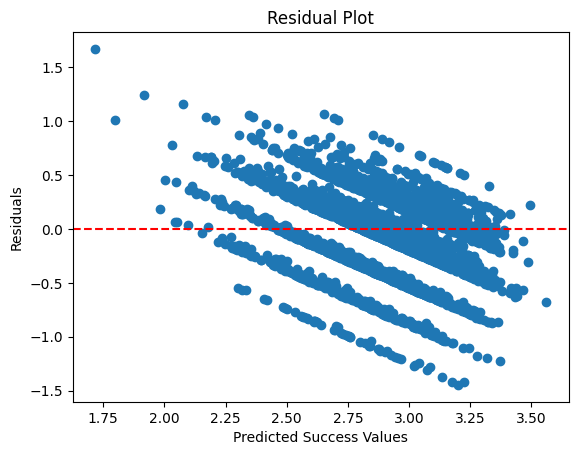

In [32]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred.reshape(-1)

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Predicted Success Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [12]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


AttributeError: module 'pydot' has no attribute 'InvocationException'

In [14]:
WordList = []
import nltk
from nltk.corpus import stopwords
#Make a set of common words to not count
stop_words = set(stopwords.words('english'))
#iterate through filtered data
for text in df_final.text:
    #split strings into individaual strings for words
    t = text.split()
    for i in t:
        if i.lower() not in stop_words:
            #Add words to list
            WordList+=[i]
    #Create df to hold list
df = pd.DataFrame({'Word': WordList})
#Group by, count, sort, and add a new column header to hold counts
df_counts = df.groupby("Word")["Word"].count().sort_values(ascending = False).reset_index(name="Count").head(30)
print(df_counts)


       Word  Count
0     place  13684
1      food  13206
2      good  11145
3      like  11115
4     great   8996
5       get   8341
6    really   8188
7       one   7587
8     would   7262
9        go   6816
10     time   6598
11        -   6402
12     back   6139
13  ordered   6071
14  service   5925
15     also   5595
16      got   5383
17   little   5213
18     I've   5008
19      I'm   4937
20   always   4802
21     love   4750
22      try   4585
23       us   4405
24     came   4323
25    order   4304
26   pretty   4251
27     even   4150
28      it.   4146
29     nice   4063


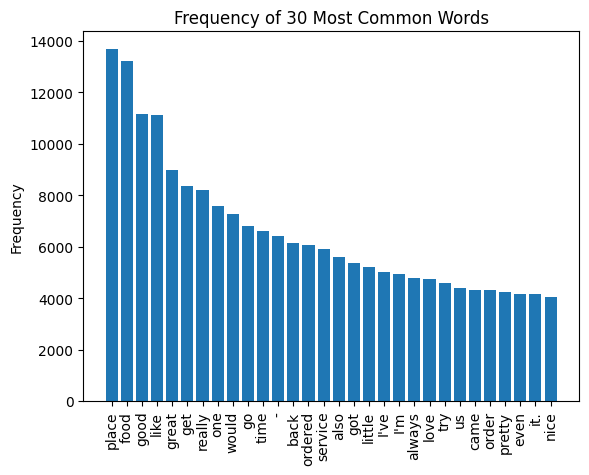

In [33]:
fig, ax = plt.subplots()
#Using original dataframe
words = df_counts["Word"]
counts = df_counts["Count"]

ax.bar(words, counts)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of 30 Most Common Words')

plt.xticks(rotation='vertical')
plt.show()

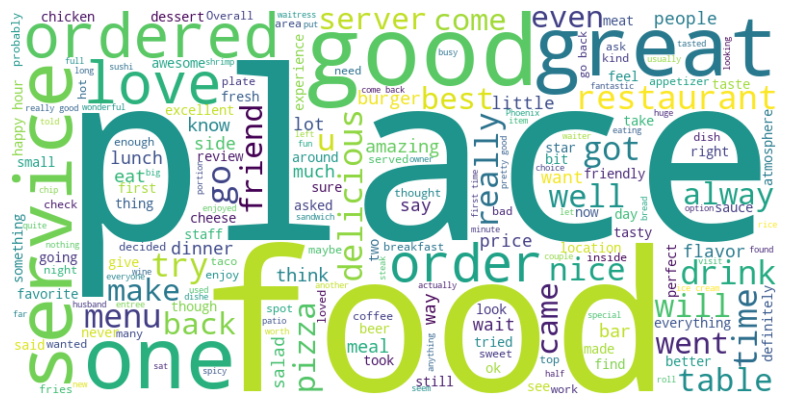

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Assuming `df` is your DataFrame and `text_column` is the column containing textual data
text_data = ' '.join(df_final['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()